# Primo Notebook

# Comandi Preliminari
Nelle prime tre celle vengono scaricati i dati da google drive e immagazzinati in modo da renderli disponibili all'interno del notebook.

In [2]:
# Download the data from google drive

from matplotlib import pyplot
import os
if os.path.isfile('test93_0_20000.npz') :
    print ("File already downloaded")
else:
    !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1RhxZfiQFp7GidUS_ayJADDdQM6OfG3ye' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1RhxZfiQFp7GidUS_ayJADDdQM6OfG3ye" -O test93_0_20000.npz && rm -rf /tmp/cookies.txt
  

File already downloaded


In [3]:
# checking that we have the data file

os.path.isfile('test93_0_20000.npz')

import glob
glob.glob("*npz")

['test93_20000_40000.npz', 'test93_0_20000.npz']

In [4]:
# loading a data file

import numpy

f=numpy.load("test93_0_20000.npz")

data = f["arr_0"]

Alla fine di questo processo i dati con cui lavoreremo sono immagazzinati nella variabile "data"

In [5]:
data.shape

(20000, 52)

Usando il comando "shape" possiamo capire la "forma" dei nostri dati. Nel nostro caso (20000, 52) vuol dire semplicemente che si tratta di una matrice di 20000 righe e 52 colonne. Ogni riga rappresenta un evento diverso e le 52 colonne rappresentano tutte le variabili associate a ciascun evento. Dunque in questo set sono raccolti i dati della rivelazione di 20000 jet adronici a ciascuno dei quali sono associate 52 variabili.

Proviamo ad accedere ai dati veri e propri. Se volessi conoscere il valore della prima variabile per il primo jet adronico nel set dovrei scrivere:

In [6]:
data[0,0]

30.420133590698242

Ricordiamo che gli indici partono sempre da 0, non da 1. Quindi in questo caso il primo indice (quello a sinistra della virgola) può assumere valori da 0 a 19999, il secondo da 0 a 51.

Se volessimo conoscere i valori di tutte le variabili associate al jet 1 ci basta scrivere:

In [7]:
data[0,:]

array([ 3.04201336e+01, -4.45303470e-01,  6.00000000e+00,  4.00000000e+00,
        0.00000000e+00,  3.30000000e+01,  4.00000000e+00,  5.57122111e-01,
        2.71005705e-02,  2.00000000e+00, -7.56226596e-04, -2.18061239e-01,
       -5.92207815e-03, -9.74771321e-01,  4.00000000e+00,  0.00000000e+00,
        2.85493946e+01, -1.58774495e-01,  5.96918249e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  2.10000000e+01,  0.00000000e+00])

In questo caso il risultato ovviamente non è un numero ma un vettore di 52 elementi

I ":" indicano che voglio selezionare tutti i valori possibili dell'indice in questione. Più in generale vengono utilizzati per indicare un intervallo di valori che voglio selezionare, per esempio se volessi conoscere i valori delle variabili dalla decima alla ventesima per il primo jet dovrei scrivere:

In [122]:
data[0,9:20]

array([ 2.00000000e+00, -7.56226596e-04, -2.18061239e-01, -5.92207815e-03,
       -9.74771321e-01,  4.00000000e+00,  0.00000000e+00,  2.85493946e+01,
       -1.58774495e-01,  5.96918249e+00,  0.00000000e+00])

Attenzione:
* Gli indici partono da 0
* Per convenzione l'indice a sinistra dei due punti viene compreso nel conteggio, quello a destra viene escluso<br>
Dunque scrivendo "9:20" sto chiedendo di prendere gli indici 9,10,11,12,13,14,15,16,17,18,19 che corrispondono alle variabili dalla decima alla ventesima (entrambe comprese).

__Provare a farsi restituire il valore della variabile 50 per tutti i jet dal cinquantesimo al centesimo__

# Significato delle variabili

Ovviamente non entreremo nel dettaglio sul significato delle variabili. Per i nostri scopi ci è sufficiente sapere che queste sono divise in 8 categorie e per ora ci interesseremo solo delle variabili nella prima, nella terza e nella settima.

* Prima categoria:
Contiene le variabili cinematiche, ovvero:<br>
0 - Impulso trasverso del jet ("jet_pt")<br>
1 - Rapidità del jet ("jet_eta")
* Terza categoria:
Contiene le variabili da 7 a 15, ovvero le variabili discriminanti del b-tagging. Come visto a lezione i b-jets hanno delle caratteristiche che ci permettono di distinguerli dagli altri, tra queste l'ampiezza, il numero di particelle in essi contenute e altre. Queste caratteristiche sono quelle rappresentate da queste variabili le quali sono quindi le più indicate per essere analizzate e sperare che ci diano informazioni sulla natura del jet.
* Settima categoria:
Contiene una variabile, la 50, ovvero la "truth" traducibile come "verità". Si tratta della variabile che identifica ogni singolo jet in una delle categorie viste a lezione.

Lo scopo di questo notebook sarà di scoprire quale delle variabili discriminanti è più efficace nel suo mestiere. Ovvero quale ci permette di separare più efficacemente i b-jets da jet di altri tipi.

# Grafico della popolazione

Concentriamoci per ora sulla variabile 50. Questa assegna a ciascun jet un numero intero pari a 1, 4, 5 o 21. Quanto al significato di questi valori:
* 1 = jet leggero
* 4 = c-jet
* 5 = b-jet
* 21 = jet gluonico
Questo significa che, per esempio, se scrivo:

In [9]:
data[0,50]

21.0

Avendo ottenuto 21 so che il primo jet del set è un jet gluonico

Se voglio avere un'idea di quanti jet ci sono nel mio set per ogni categoria non devo fare altro che un istogramma della variabile 50 per tutti i jet del set.
Lo faccio sfruttando una funzione della libreria pyplot:

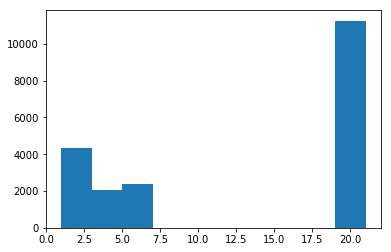

In [10]:
pyplot.hist(data[:,50])
pyplot.show()

__Cosa deduco guardando l'istogramma?__

# Dividere i dati in categorie

Ci sarebbe comodo dividere il set "data" in 4 categorie diverse in modo da poter accedere facilmente a tutti i b-jet, tutti i c-jet eccetera. Per farlo procediamo come segue:

In [11]:
data[data[:,50]==1]

array([[144.63471985,  -1.22798944,   8.        , ...,   0.        ,
          1.        ,   1.        ],
       [ 65.54579163,   0.80091989,   5.        , ...,   0.        ,
          1.        ,   1.        ],
       [ 62.18005753,  -0.2915546 ,   7.        , ...,   0.        ,
          1.        ,   0.        ],
       ...,
       [ 42.61270905,  -0.5203647 ,   4.        , ...,   0.        ,
          1.        ,   1.        ],
       [ 46.75649261,  -0.86630964,   7.        , ...,   0.        ,
          1.        ,   0.        ],
       [ 44.055233  ,   1.47807074,   9.        , ...,   0.        ,
          1.        ,   0.        ]])

Teniamo presente che, ogni volta che mettiamo le parentesi quadre dopo il nome di un set, stiamo essenzialmente ponendo una condizione e vogliamo che il codice ci restituisca solo la porzione del set originale che soddisfa la condizione tra parentesi.
In questo caso la condizione è: "data[:,50]==1" il ché vuol dire che, partendo da tutti i 20000 jet, voglio che il codice mi restituisca solo quelli per cui la variabile 50 abbia valore 1, ovvero solo i jet leggeri. Possiamo usare lo stesso metodo per le altre categorie e scrivere quindi:

In [12]:
light_jets = data[data[:,50]==1]
c_jets = data[data[:,50]==4]
b_jets = data[data[:,50]==5]
gluon_jets = data[data[:,50]==21]

Usando il comando "shape" su questi set possiamo sapere per esempio esattamente quanti jet di ogni tipo ci sono nel set di partenza.<br>
__Provare e verificare che il totale ammonti a 20000.__

A questo punto è possibile creare un istogramma più esplicito:

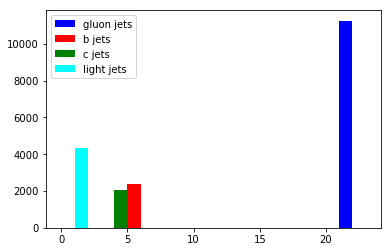

In [13]:
bins=range(0,24)
pyplot.hist(gluon_jets[:,50], color="blue", bins=bins, label="gluon jets")
pyplot.hist(b_jets[:,50], color="red", bins=bins, label="b jets")
pyplot.hist(c_jets[:,50], color="green", bins=bins, label="c jets")
pyplot.hist(light_jets[:,50], color="cyan", bins=bins, label="light jets")
pyplot.legend()
pyplot.show()

# Grafici delle variabili per categoria

Segue la definizione della funzione che useremo per i grafici

In [123]:
isB=data[:,50]==5
isC=data[:,50]==4
isL=data[:,50]==1
isG=data[:,50]==21

def plot_function(  data, categories=[isB, isC, isL, isG], labels=["b jets","c jets","light jets","gluon jets"], colors=["red","green","cyan","blue"], name="grafico", log=False, mybins=None, normalized=False ):

    mean=numpy.mean(data)
    stdev=numpy.std(data)
    lenbin=stdev/(len(data)**0.5)    
    
    if (lenbin==0) :
        return
    
    binning=numpy.arange(mean-2*stdev, mean+2*stdev, lenbin*10)    
    if mybins is not None:
      binning=mybins

    pyplot.clf()
    
    for i in range(len(categories)):
        cat=categories[i]
        color=colors[i]
        label=labels[i]
        
        if normalized == True:
            pyplot.hist(data[cat], color=color, label=label, histtype='step', bins=binning, log=log, density=True)
        else: 
            pyplot.hist(data[cat], color=color, label=label, histtype='step', bins=binning, log=log)

    pyplot.legend()
    pyplot.xlabel(name)
    pyplot.ylabel("entries")
    pyplot.savefig(name+".png")
    

Per fare un grafico di qualunque variabile divisa per categoria basta scrivere:

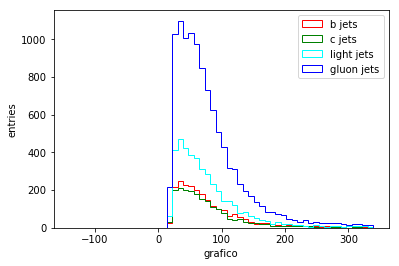

In [15]:
plot_function(data[:,0])

Dove in questo caso abbiamo graficato l'impulso trasverso (variabile 0). Per graficare qualunque altra variabile basta sostituire "0" con il numero corrispondente.

Dal grafico qui sopra possiamo notare che le 4 curve per le 4 categorie sembrano essere ciascuna una copia scalata dell'altra, dove la scala è data dalla popolosità della categoria rappresentata. In particolare la categoria dei jet gluonici è la più popolosa e infatti la figura blu è la più alta. Quello che è importante è che, a parte per l'altezza, le 4 figure sembrano non differire più di tanto nella forma e questo può solo stare a significare che la variabile in questione ("jet_pt") ha un valore che non dipende dalla categoria di appartenenza del jet e dunque non è una buona variabile discriminante. Questo si nota facilmente se mostriamo un grafico normalizzato, ovvero in cui l'area sottesa da tutte e 4 le curve è pari a 1 (in pratica si perde l'informazione sulla popolosità della categoria e rimane solo la forma di distribuzione della variabile):

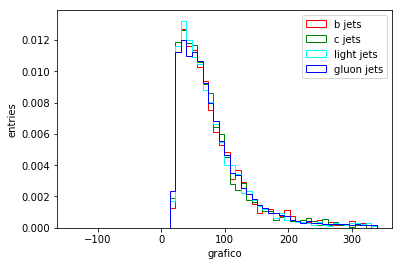

In [17]:
plot_function(data[:,0], normalized=True)

Si nota facilmente che le 4 curve sembrano una ricalcare l'altra, a sostegno della tesi esplicitata poco fa.

__Provare a fare il grafico per la rapidità. Cosa concludiamo da quest'ultimo?__

# Grafici di variabili discriminanti

In questa sezione ci concentreremo sulle variabili 11,13,14,15 in quanto sono quelle per cui è più facile dedurre il potere discriminante guardando i grafici. Le altre variabili della categoria hanno infatti valori troppo vicini tra di loro per ciascun jet e questo impone che all'interno dell'istogramma tutti i valori rientrano nella stessa suddivisione. Per esempio:

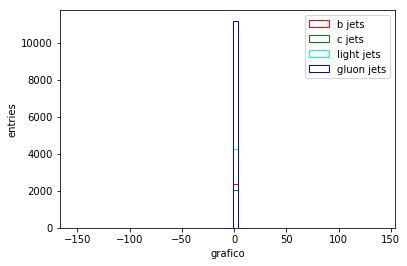

In [100]:
plot_function(data[:,7])

Il problema si potrebbe risolvere cambiando manualmente la suddivisione, ma per evitare di complicare troppo le cose ci concentriamo sulle altre variabili.

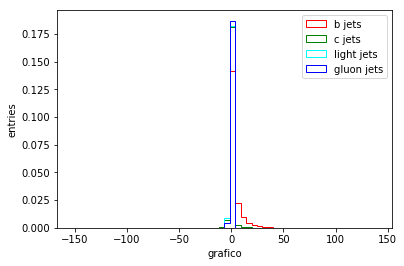

In [101]:
plot_function(data[:,11],normalized=True)

Per aumentare la risoluzione della zona del grafico che ci interessa possiamo applicare all'asse y una scala logaritmica in questo modo:

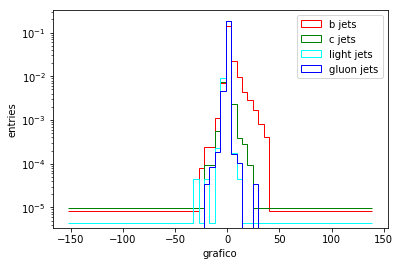

In [104]:
plot_function(data[:,11],normalized=True,log=True)

Da quest'ultimo grafico si nota che, a differenza dei grafici dell'impulso trasverso e della rapidità, la figura rossa è spostata leggermente verso destra rispetto a tutte le altre. Questo ci da un indizio sul fatto che questa variabile sia effettivamente dipendente dal tipo di jet e in particolare dal fatto che questo sia un b-jet o meno.

__Provare a fare i grafici per le altre variabili consigliate e trarre le conclusioni. Quale ci aspettiamo (ad occhio) che sia la variabile che discrimini meglio i b-jet dagli altri?__

# L'algoritmo di discriminazione  (preliminari)

In [47]:
from sklearn.metrics import roc_curve, auc

Per comprendere quello che viene dopo perdiamo un po' di tempo su una sintassi particolare in python.<br>
Attenzione: i vettori isB, isC, isL, isG sono stati definiti manualmente qualche cella più in alto. Tenere presente che in tutti gli esempi qui sotto la scrittura "[:20]" è puramente una questione di praticità in quanto consente di visualizzare i primi 20 elementi dei vettori considerati.

isB è un vettore di 20000 elementi come il numero di jet nel set. Il valore booleano (True o False) all'indice n indica se l'evento n-esimo è un b-jet (True) o no (False):

In [105]:
isB[:20]

array([False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False])

Stessa cosa per i c-jet

In [106]:
isC[:20]

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False])

In python: 
* False + False = False
* False + True = True
* True + True = True<br>
La somma di due vettori avviene elemento per elemento. Dunque nell'esempio seguente:<br>
Il valore booleano all'indice n indica se l'evento n-esimo è un b-jet o un c-jet (True) o nessuno dei due (False):

In [113]:
(isB+isC)[:20]

array([False, False, False,  True, False,  True, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False])

Come detto prima tra parentesi quadre c'è una condizione, in questo caso "isB", dunque il seguente è lo stesso vettore dell'inizio che però comprende soltanto gli eventi classificati come b-jet, i quali sono ovviamente tutti b-jet e quindi hanno tutti valore booleano True:

In [115]:
isB[isB][:20]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

__Dunque se scrivessi: isB[isC] cosa mi aspetterei?__

Quindi il vettore che segue è lo stesso vettore di partenza ma comprende solo gli eventi classificati come b-jet (True) o come c-jet (False):

In [117]:
isB[isB+isC][:20]

array([ True,  True, False,  True,  True, False, False,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False, False])

Ovviamente ha molti meno elementi di isB:

In [127]:
isB[isB+isC].shape

(4409,)

__E il vettore isB[isB+isL+isG] che cos'è? Quanti elementi ha?__

Definiamoli esplicitamente:

In [124]:
isBvsC = isB[isB+isC]
isBvsLG = isB[isB+isL+isG]

Ricapitolando:
* isB è un vettore di 20000 elementi composto da valori booleani, se all'indice n il valore "isB[n]" è False allora il jet n NON è un b-jet, se è True allora lo è;
* isBvsC è un vettore di 4409 elementi in quanto comprende solo quelli classificati o come b-jet o come c-jet: se all'indice n il valore "isBvsC[n]" è False allora il jet n è un c-jet, se è True allora è un b-jet;
* isBvsLG comprende i b-jet, i jet leggeri e i gluonici: se all'indice n il valore "isBvsLG[n]" è False allora il jet n è un jet leggero o un jet gluonico, se è True allora è un b-jet.

Abbiamo creato questi tre vettori diversi in quanto vogliamo capire quale dei seguenti compiti è più difficile:<br>
- Distinguere i b-jet da qualunque altro tipo di jet
- Distinguere i b-jet dai c-jet
- Distinguere i b-jet dai jet leggeri e gluonici

__In base a cosa abbiamo detto nella teoria, cosa ci aspettiamo?__

# Curve ROC e AUC

Scriviamo prima il codice dell'algoritmo utilizzando come variabile discriminante la numero 11:

In [142]:
# B vs ALL

fpr, tpr, threshold = roc_curve(isB,data[:,11])
auc1 = auc(fpr, tpr)

# B vs c

fpr2, tpr2, threshold2 = roc_curve(isBvsC,data[:,11][isB+isC])
auc2 = auc(fpr2, tpr2)

# B vs light/gluon

fpr3, tpr3, threshold3 = roc_curve(isBvsLG, data[:,11][isB+isL+isG])
auc3 = auc(fpr3, tpr3)

0.6702144535131177 0.6551470125447613 0.6721782172260098


Per capire come funziona visualiziamo il vettore threshold (è indifferente che sia il primo, il secondo o il terzo) che ci viene restituito dall'algoritmo:

In [143]:
threshold.shape

(2744,)

In [135]:
threshold[:20] # Parte da un valore arbitrario > max(jetvars[:,11]). Scala poco a poco fino ad arrivare a un valore < min(jetvars[:,11])
               # Ad ogni step ogni valore in jetvars[:,11] che sia > threshold viene etichettato come positivo. Partendo da questo dato
               # si possono calcolare il tpr e il fpr in base a quanti sono gli eventi correttamente e erroneamente etichettati come positivi.
               # Partendo da fpr e da tpr si grafica la ROC. La AUC è l'area sottesa dalla ROC. Più è bassa, più il modello è funzionale.

array([41.10481262, 40.10481262, 27.75101662, 26.91142273, 20.77487183,
       20.62183952, 17.18819618, 17.15910149, 17.02704048, 17.02688789,
       16.49670792, 16.48767662, 12.66849899, 12.61098862, 11.32164288,
       11.3081913 , 11.21467113, 11.19307518, 10.64703846, 10.64122581])

In [139]:
threshold[-20:] # Scrittura analoga a "threshold[2724:]" -> Seleziona solo gli ultimi 20 elementi

array([  -7.97987986,   -8.84355068,   -9.10871029,   -9.30560589,
        -10.1924324 ,  -10.19857216,  -10.39178848,  -11.15960217,
        -11.52142143,  -11.54287052,  -12.72215271,  -13.31455231,
        -15.60561466,  -16.61683464,  -18.15948868,  -19.9670639 ,
        -20.31702995,  -26.25210953,  -30.22772789, -999.        ])

La threshold parte da un valore arbitrario che sia maggiore del valore massimo assunto dalla variabile discriminante utilizzata nell'algoritmo:<br>
max(threshold) == threshold[0] > max(data[:,11])<br>
In oltre i suoi valori sono strettamente decrescenti e l'ultimo elemento è minore del valore minimo assunto dalla variabile discriminante:<br>
min(threshold) == threshold[2744] < min(data[:,11])<br>

L'algorito in se è composto in questo caso da 2744 step, corrispondente al numero di elementi nel vettore threshold. Al primo step:
* Si prende il valore del primo elemento in threshold, nel nostro caso 41.105;
* Si mette a confronto questo numero con TUTTI i valori contenuti nel vettore "data[:,11]";
* Ogni valore del vettore che sia maggiore di 41.105 viene etichettato come "positivo";
* Ogni valore del vettore che sia minore di 41.105 viene etichettato come "negativo";<br>
"positivo" e "negativo" vanno pensate come ipotesi: un valore etichettato come positvo è un valore che si ipotizza essere associato a un b-jet, un valore etichettato come negativo si ipotizza NON essere associato a un b-jet.<br>
Essendo che il primo valore di threshold è per costruzione maggiore di qualunque valore all'interno di data[:,11], segue che al primo step ogni valore verrà etichettato come negativo.<br>
L'algoritmo prosegue step dopo step prendendo ogni volta l'elemento successivo in threshold, e etichettando ad ogni step tutti i valore in data[:,11] come positivi o negativi.<br>
Naturalmente, essendo che l'ultimo valore di threshold è minore di ogni valore in data[:,11], all'ultimo step tutti gli elementi in data[:,11] verranno etichettati come positivi.<br>

### La "truth"
All'interno di ogni step, dopo la fase di confronto, ci ritroviamo con un vettore di elementi booleani True o False (positivo o negativo), chiamiamolo per esempio "ipotesi", il valore ipotesi[n] corrisponde appunto all'ipotesi sul fatto che il jet n-esimo sia un b-jet o meno. Questo valore andrà confrontato con qualcosa, ovvero con la "truth" o la "verità".<br>
Prendiamo come esempio il primo caso, in cui vogliamo distinguere i b-jet da ogni altro tipo di jet, in questo caso usiamo il set completo di 20000 jet. Ricordiamo che per questo caso abbiamo costruito il vettore isB il quale è composto proprio da 20000 elementi ciascuno dei quali è un valore booleano (True o False), ogni valore corrisponde alla verità sul singolo jet. Un valore True di isB[n] ci indica che il jet n-esimo è un b-jet e viceversa.<br>
Capiamo ora che dobbiamo confrontare il valore ipotesi[n] col valore isB[n] (confrontare le ipotesi con le verità) e possono risultare i seguenti casi:
* ipotesi[n] = isB[n] = True -> Vero Positivo (True Positive), ovvero abbiamo ipotizzato correttamente che il jet n-esimo fosse un b-jet;
* ipotesi[n] = isB[n] = False -> Vero Negativo (True Negative), ovvero abbiamo ipotizzato correttamente che il jet n-esimo NON fosse un b-jet;
* ipotesi[n] = True, isB[n] = False -> Falso Positivo (False Positive), ovvero abbiamo ipotizzato che il jet n-esimo fosse un b-jet mentre in realtà non lo è;
* ipotesi[n] = False, isB[n] = True -> Falso Negativo (False Negative), ovvero abbiamo ipotizzato che il jet n-esimo NON fosse un b-jet mentre in realtà lo è.

### Costruire la curva ROC
La curva ROC è un grafico che ha sulle ascisse il numero di veri positivi diviso per il numero totale di positivi (true positive rate o tpr) e sulle ordinate il numero di falsi positivi diviso per il numero totale di negativi (false positive rate o fpr). Si costruisce nel nostro caso in 2744 step, ogni step corrisponde a un valore di threshold diverso:
* Si parte dal primo valore di threshold;
* Si segna sul grafico il punto che corrisponde al numero di veri positivi e falsi positivi ottenuti con tale valore di threshold;<br>
Osservazione: il primo valore di threshold è tale per cui non si avrà nemmeno un falso positivo e nemmeno un vero positivo (in quanto nessun valore sarà ipotizzato come positivo), dunque il primo punto sarà sempre in (0,0).
* Si procede così per tutti gli altri valori di threshold segnando punto per punto, per poi unire tutti i punti.<br>
Osservazione: l'ultimo valore di threshold è tale per cui tutti i jet vengono etichettati come positivi, dunque tutti i negativi vengono erroneamente ipotizzati positivi e tutti i positivi vengono correttamente ipotizzati positivi, quindi l'ultimo punto sarà sempre in (1,1).

Ecco la curva ROC creata dall'algoritmo precedente:

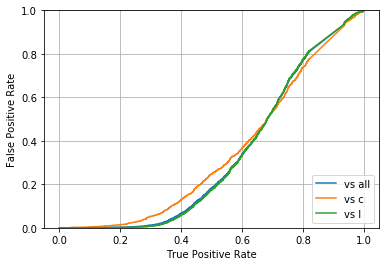

In [145]:
pyplot.plot(tpr,fpr,label="vs all")
pyplot.plot(tpr2,fpr2,label="vs c")
pyplot.plot(tpr3,fpr3,label="vs l")
pyplot.xlabel("True Positive Rate")
pyplot.ylabel("False Positive Rate")
pyplot.ylim(0.000001,1)
pyplot.grid(True)
pyplot.legend(loc='lower right')

### AUC
Un criterio semplice per valutare l'efficienza di una variabile discriminante è questo:<br>
_"All'aumentare del tpr, più l'fpr resta basso più la variabile è efficiente"_<br>
__Provare a ragionarci sopra, perché ha senso?__

Ovvero, riferendoci alla figura qui sopra, più la curva risulta "schiacciata" contro l'asse delle ascisse, il ché equivale a dire: _più l'integrale della curva ROC è basso, più la variabile è efficiente._<br>
L'integrale della curva ROC ha un nome, si chiama AUC (area under the curve) e fortunatamete ci viene fornito direttamente dal nostro algoritmo.

In [146]:
print (auc1, auc2, auc3)

0.6702144535131177 0.6551470125447613 0.6721782172260098


Il grafico sopra contiene tre curve ROC, come avevamo anticipato volevamo scoprire quale dei jet fosse più difficile da distinguere dal b-jet.<br>
__Cosa si deduce dalle curve? Ciò rispecchia quello che ci aspettiamo dalla teoria?__

__Provare a costruire le curve ROC per tutte le variabili consigliate__ (per farlo basta sostituire nell'algoritmo dove c'è "data[:,11]", al posto di 11 un altro numero)<br>

__Confrontare le AUC per tutte queste variabili, qual è la variabile discriminante più efficiente?__